In [1]:
# Import necessary libraries
import numpy as np  # Library for scientific computing
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for creating statistically-informed visualizations
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Load the dataset
df = pd.read_excel("loan.xlsx")

In [4]:
# Print the first 5 rows of the dataframe
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
# Print the dataframe info to understand its structure and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [6]:
# Print the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [7]:
# Handle missing values by filling them with the mode or mean of the respective column
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [8]:
# Create new features
df['loanAmount_log'] = np.log(df['LoanAmount'])
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

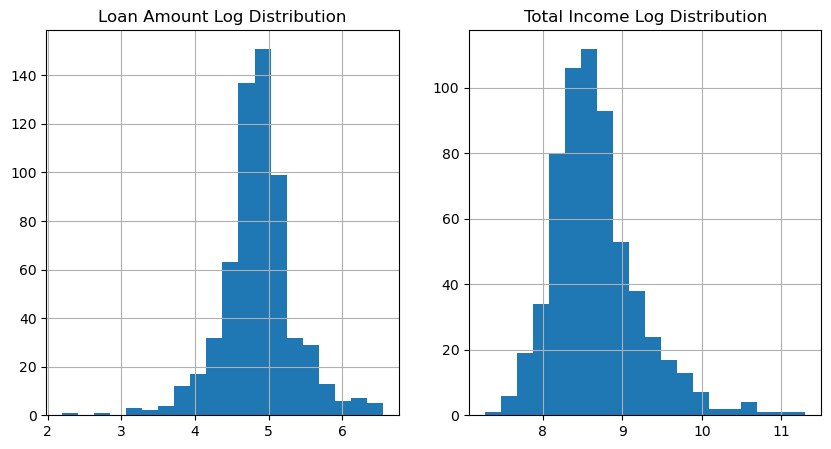

In [10]:
# Visualize the distributions after log transformation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['loanAmount_log'].hist(bins=20)
plt.title('Loan Amount Log Distribution')

plt.subplot(1, 2, 2)
df['TotalIncome_log'].hist(bins=20)
plt.title('Total Income Log Distribution')
plt.show()


In [15]:
# Convert all values in categorical columns to strings
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df[categorical_features] = df[categorical_features].astype(str)


In [16]:
# Encode categorical variables and scale numerical features using a pipeline
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['loanAmount_log', 'TotalIncome_log', 'Loan_Amount_Term', 'Credit_History']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [17]:
# Prepare the data for modeling
X = df[categorical_features + numerical_features]
y = df['Loan_Status']

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"Accuracy of {name}: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

# Ensemble model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', ensemble)])
pipeline.fit(X_train, y_train)
y_pred_ensemble = pipeline.predict(X_test)

print(f"Accuracy of Ensemble Model: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print(f"Classification Report for Ensemble Model:\n{classification_report(y_test, y_pred_ensemble)}")


Accuracy of RandomForest: 78.05%
Classification Report for RandomForest:
              precision    recall  f1-score   support

           N       0.64      0.42      0.51        33
           Y       0.81      0.91      0.86        90

    accuracy                           0.78       123
   macro avg       0.72      0.67      0.68       123
weighted avg       0.76      0.78      0.76       123

Accuracy of NaiveBayes: 82.93%
Classification Report for NaiveBayes:
              precision    recall  f1-score   support

           N       0.88      0.42      0.57        33
           Y       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

Accuracy of DecisionTree: 65.85%
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           N       0.40      0.58      0.48        33
           Y       0.8

C:\Users\Laboni Dwari\.conda\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of Ensemble Model: 78.05%
Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           N       0.64      0.42      0.51        33
           Y       0.81      0.91      0.86        90

    accuracy                           0.78       123
   macro avg       0.72      0.67      0.68       123
weighted avg       0.76      0.78      0.76       123



C:\Users\Laboni Dwari\.conda\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
# Use an ensemble method to combine predictions from different models
ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
], voting='hard')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', ensemble)])
pipeline.fit(X_train, y_train)
y_pred_ensemble = pipeline.predict(X_test)

print(f"Accuracy of Ensemble Model: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print(f"Classification Report for Ensemble Model:\n{classification_report(y_test, y_pred_ensemble)}\n")


Accuracy of Ensemble Model: 78.86%
Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           N       0.67      0.42      0.52        33
           Y       0.81      0.92      0.86        90

    accuracy                           0.79       123
   macro avg       0.74      0.67      0.69       123
weighted avg       0.77      0.79      0.77       123




C:\Users\Laboni Dwari\.conda\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C:\Users\Laboni Dwari\.conda\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Laboni Dwari\.conda\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

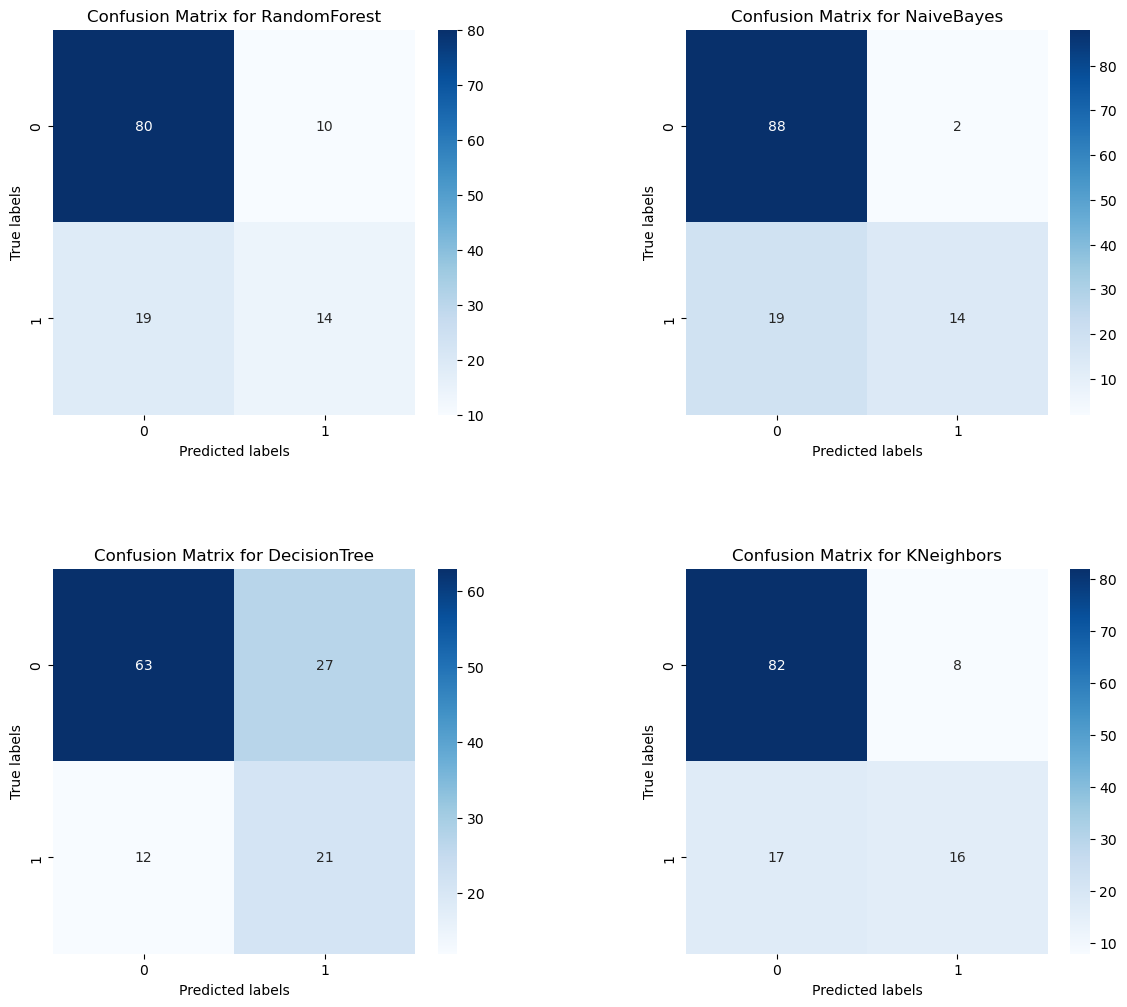

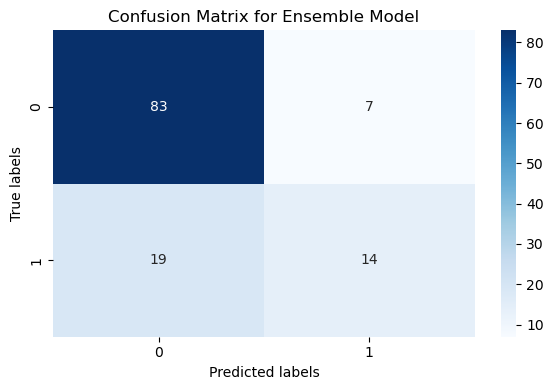

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots((len(models) + 1) // 2, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust the space between subplots

# Train and evaluate each model
for i, (name, model) in enumerate(models.items()):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=['Y', 'N'])
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(f'Confusion Matrix for {name}')
    axs[i // 2, i % 2].set_xlabel('Predicted labels')
    axs[i // 2, i % 2].set_ylabel('True labels')

# Plot confusion matrix for the ensemble model in the next available subplot
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', ensemble)])
pipeline.fit(X_train, y_train)
y_pred_ensemble = pipeline.predict(X_test)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble, labels=['Y', 'N'])

# Handle the case where the number of models is odd
if len(models) % 2 != 0:
    sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap=plt.cm.Blues, ax=axs[-1, -1])
    axs[-1, -1].set_title('Confusion Matrix for Ensemble Model')
    axs[-1, -1].set_xlabel('Predicted labels')
    axs[-1, -1].set_ylabel('True labels')
else:
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap=plt.cm.Blues, ax=ax)
    ax.set_title('Confusion Matrix for Ensemble Model')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plt.tight_layout()

# Save the figure to a file
plt.savefig('confusion_matrix_report.png')  # Save as a PNG file, you can change the extension as needed
plt.show()